In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib
from matplotlib import rc
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from textwrap import wrap


rc('text', usetex=False)
sns.set_context('paper', font_scale=2.0)
sns.set_style('whitegrid')


In [2]:
raw_data = pd.read_csv('nhrdperf.csv')

raw_data

,Benchmark,Baseline,LBPU,LBPUNotSplit
0,mt,0.011300,0.007960,0.007260
1,mm,0.156800,0.110700,0.131100
2,km,0.100200,0.077700,0.090500
3,st,0.045100,0.042900,0.043200
4,pr,0.101200,0.084500,0.085700
5,spmv,0.112200,0.031600,0.045760
6,flw,0.064300,0.054500,0.050000
7,fir,0.004940,0.004940,0.004940
8,bs,0.076300,0.076300,0.076300
9,sc,0.000839,0.000839,0.000839


In [3]:
stacked_data = raw_data

stacked_data['LBPU'] = stacked_data['Baseline'] / stacked_data['LBPU']
stacked_data['LBPUNotSplit'] = stacked_data['Baseline'] / stacked_data['LBPUNotSplit']
stacked_data['Baseline'] = stacked_data['Baseline'] / stacked_data['Baseline']

stacked_data = stacked_data.melt(id_vars=['Benchmark'], value_vars=['Baseline', 'LBPU','LBPUNotSplit'])
stacked_data['Benchmark'] = stacked_data['Benchmark'].str.upper()
stacked_data.columns = ['Benchmark', 'Configuration', 'Speedup']
stacked_data = stacked_data.reset_index()
stacked_data

,index,Benchmark,Configuration,Speedup
0,0,MT,Baseline,1.000000
1,1,MM,Baseline,1.000000
2,2,KM,Baseline,1.000000
3,3,ST,Baseline,1.000000
4,4,PR,Baseline,1.000000
5,5,SPMV,Baseline,1.000000
6,6,FLW,Baseline,1.000000
7,7,FIR,Baseline,1.000000
8,8,BS,Baseline,1.000000
9,9,SC,Baseline,1.000000


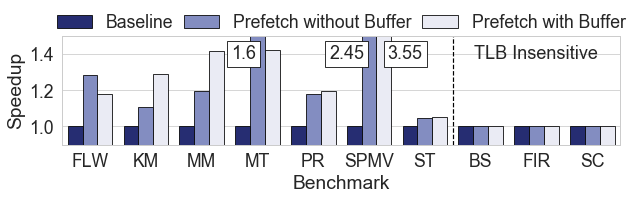

In [4]:
fig, ax = plt.subplots(figsize=(10, 2))
sns.barplot(data=stacked_data, 
            x='Benchmark', hue='Configuration', y='Speedup',
            order=["FLW", "KM", "MM", "MT", "PR", "SPMV", "ST", "BS", "FIR", "SC"], 
            hue_order=['Baseline', 'LBPUNotSplit', 'LBPU'],
            palette=['#1A237E','#7986CB','#E8EAF6'], ec='k',
            ax=ax)
handles, labels = ax.get_legend_handles_labels()
labels = ['Baseline', 'Prefetch without Buffer', 'Prefetch with Buffer']
ax.legend(handles, labels, 
          frameon=False,
          fancybox=None, 
          columnspacing=0.6,
          facecolor=None, edgecolor=None, 
          bbox_to_anchor=(0.5, 1.12), loc="center", ncol=3)
ax.set_ylim(0.9, 1.5)
# ax.set_yticks([0, 0.25, 0.5, 0.75, 1])
ax.set_ylabel('Speedup')

ax.text(2.75, 1.4, 1.6, 
        horizontalalignment='center', verticalalignment='center',
        fontsize=18, bbox=dict(facecolor='white', ec='k'))
ax.text(4.6, 1.4, 2.45, 
        horizontalalignment='center', verticalalignment='center',
        fontsize=18, bbox=dict(facecolor='white', ec='k'))
ax.text(5.65, 1.4, 3.55, 
        horizontalalignment='center', verticalalignment='center',
        fontsize=18, bbox=dict(facecolor='white', ec='k'))


ax.axvline(6.5, 0, 1, c='k', ls='--')
ax.text(8, 1.4, 'TLB Insensitive',  horizontalalignment='center', verticalalignment='center',
        fontsize=18)

plt.savefig('nhrdperf.pdf', bbox_inches='tight')
plt.savefig('nhrdperf.png', dpi=600, bbox_inches='tight')
plt.show()
plt.close()
